In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tomli

from unicycle import (InferenceConfig, SimulationConfig, Unicycle,
                      simulate_system)
from utils import plot_system_states_only, plot_trajectory_without_predictors

base_path = Path(os.getcwd()).parent

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "times",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/bel fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

plt.rcParams.update(tex_fonts)

Load general config settings

In [3]:
config = 'configs/config.toml'
abs_config_path = (base_path / config).resolve()
with open(abs_config_path, 'rb') as f:
    data = tomli.load(f)
    simulation_cfg = SimulationConfig(**data['simulation'])

Evaluate trained models

In [4]:
# Initial conditions
init_state = np.ones(3, dtype=np.float32)

# Exact predictor feedback simualtion
unicycle = Unicycle(init_state, simulation_cfg)
states, controls, predictors, _, control_pdes = simulate_system(unicycle)

# DeepONet approximated predictor feedback simualtion
deeponet_name = 'DeepONet'
deeponet_P1 = (base_path / f'models/Unicycle_delays_25_60_dx_01_DeepONet_P1.pth').resolve()
deeponet_P2 = (base_path / f'models/Unicycle_delays_25_60_dx_01_DeepONet_P2.pth').resolve()
DeepONet_cfg = InferenceConfig(deeponet_name, deeponet_P1, deeponet_P2)

deeponet_unicycle = Unicycle(init_state, simulation_cfg, DeepONet_cfg)
deeponet_states, deeponet_controls, _, deeponet_predictors, deeponet_control_pdes = simulate_system(deeponet_unicycle)

# FNO approximated predictor feedback simualtion
fno_name = 'FNO'
fno_P1 = (base_path / f'models/Unicycle_delays_25_60_dx_01_FNO_P1.pth').resolve()
fno_P2 = (base_path / f'models/Unicycle_delays_25_60_dx_01_FNO_P2.pth').resolve()
FNO_cfg = InferenceConfig(fno_name, fno_P1, fno_P2)

fno_unicycle = Unicycle(init_state, simulation_cfg, FNO_cfg)
fno_states, fno_controls, _, fno_predictors, fno_control_pdes = simulate_system(fno_unicycle)

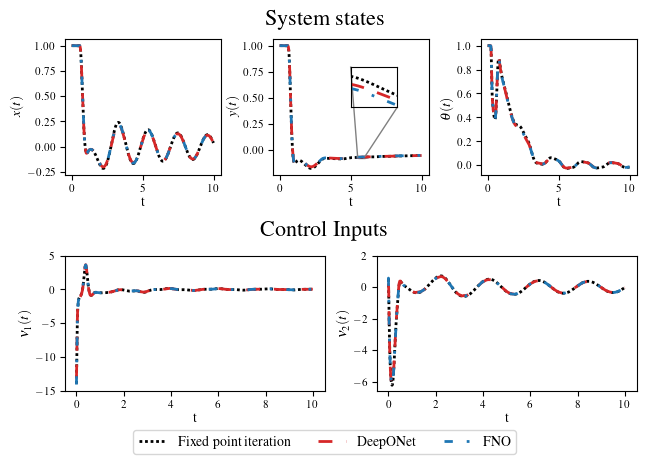

In [5]:
# Visualize
plot_trajectory_without_predictors(simulation_cfg.t, states, deeponet_states, fno_states, controls, deeponet_controls, fno_controls, savefig='single_trajectory_all', axis=True)

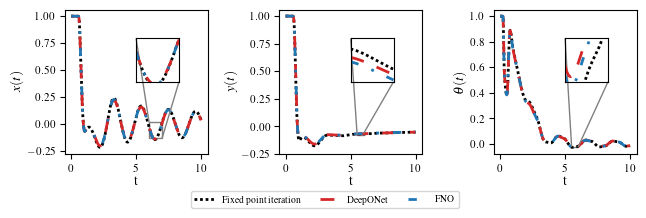

In [6]:
# Visualize - Only upper half
plot_system_states_only(simulation_cfg.t, states, deeponet_states, fno_states, savefig='single_trajectory_all_upper_half', axis=True)